# Math for Machine Learning

AWS MACHINE LEARNING: MATH FOR MACHINE LEARNING

## Unit 1 - Vectors

#### Logistic Regression

* Logistic regression - transform linear regression by a sigmoid activation function
* Often we regularization with early stopping to counteract overfitting
* Early stopping is an approximate equivalent of L2 regularization, often used in its place because it's computationally cheaper
* In practice, we use L1, L2 and early stopping
* Use a threshold, e.g., 50% or higher is a yes
* TP, TN, FP, FN
* Precision - TP / all positives
* Recall / sensitivity / TP rate - TP / (TP + FN) (or anything you **predicted** was true)
* Tune threshold to optimize metric of your choice
* Use the ROC curve to choose the decision threshold based on decision criteria
	* ROC is built by looking at FP rate (x-axis) by TP rate (y-axis) for all possible threshold choices
* Use AUC (area under curve) as an aggregate measure of performance across all possible classification thresholds
* AUC helps you choose between models when you don't know what decision threshold is ultimately going to be used
* It's like asking, "If we pick a random positive (1) and random negative (0) case, what's the probability my model will score them in the correct relative order?"
* AUC is scale-invariant and classification threshold-invariant
* People also use something like this for a precision / recall curve (or precision / recall gain curve) with different metrics on the axes (here, precision and recall, duh)
* Logistic regression predictions should be unbiased, that is, average of predictions == average of observations
* No bias doesn't necessarily mean no problem, but having bias means you **do** have a problem.  Examples of what can cause bias:
    * Incomplete feature set
    * Buggy pipeline
    * Biased training sample
* You can look for bias in slices of your data - take a look at a calibration plot - plots fitted values versus the actual average values


Sigmoid: $$\hat{y} = \frac{1}{1 + e^{-(w^T x + b)}}$$

Where $$w^T x + b$$ is the input into the sigmoid (normally the output of the linear model).  We're squishing through a sigmoid function with raising `e` to the negative power of that value.

The output of logistic regression is a calibrated probability estimate.  This is useful because we can cast binary classification problems into probabilistic problems.

The sigmoid function is the cumulative distribution function of the logistic probability distribution whose quantile function is the inverse of the logit which models the log odds.  Therefore, mathematically, the opposite of a sigmoid can be considered probabilities.

Typically, use cross entropy (which is the log loss) as the error metric.  Related to Shannon's information theory.  Loss function we use for backprop.

Less emphasis on errors where output is relatively close to the label.

Cross entropy grows exponentially when the prediction is close to the opposite label.  Very high penalty for getting something wrong, and being very confident about it.

Derivative of MSE could cause problems with training due to vanishing gradients.

$$LogLoss = \sum_{(\textbf{x}, y) \in D} -ylog (\hat{y}) - (1 - y)log(1 - \hat{y})$$

Weights will be driven to$$- \infty$$ or $$+ \infty$$ if we train long enough

Near asymptotes, sigmoid function becomes flatter and flatter, so gradients start to disappear (derivative gets closer and closer to zero).  Since we use derivative in backprop, training will stop if gradient actually becomes zero.

When this happens to all inputs, it's called **Saturation**

Adding regularization to logistic regression helps keep the model simpler by having smaller parameter weights.  This penalty term added to the loss function makes sure that cross-entropy through gradient descent doesn't keep pushing the weights closer and closer to +/- infinity and causing numerical issues.  Also, we can stay closer to the middle of the sigmoid, allowing weights to update and tuning to continue.



#### Neural Networks

* NN's combine features as an alternative to feature crosses
* Structure model so features are combined, then combinations may be combined with another layer, repeat
* Get the model to learn these through training
* If you just use linear transformation functions in the neurons of your NN layers, you just get a linear function, no learning
* Instead, use a non-linear transformation layer, aka an activation function
* Usually, all layers except last in NN are non-linear activations, and last layer is linear for regression or softmax or sigmoid for classification
* ReLu activations are great but can still lead to vanishing gradients - check out softplus:

$$Softplus = ln(1 + e^{x})$$

Remember, ln = natural log = 

$$
log_e
$$

In [3]:
import numpy as np

In [18]:
x = np.linspace(-5, 5, num=100)


In [19]:
import math

In [20]:
np.log(1 + math.e**x)

array([0.00671535, 0.00742646, 0.00821257, 0.00908152, 0.01004194,
       0.01110337, 0.01227631, 0.01357232, 0.01500412, 0.01658572,
       0.01833251, 0.02026142, 0.02239102, 0.0247417 , 0.02733581,
       0.03019782, 0.03335452, 0.03683516, 0.04067169, 0.04489892,
       0.04955473, 0.05468026, 0.06032013, 0.06652261, 0.07333982,
       0.08082786, 0.08904698, 0.09806167, 0.10794073, 0.11875731,
       0.1305888 , 0.14351678, 0.15762678, 0.17300799, 0.18975286,
       0.20795657, 0.22771641, 0.24913098, 0.27229932, 0.2973199 ,
       0.32428949, 0.3533019 , 0.38444679, 0.41780824, 0.45346348,
       0.49148158, 0.53192222, 0.57483459, 0.62025647, 0.66821347,
       0.71871852, 0.77177162, 0.82735984, 0.88545757, 0.94602703,
       1.00901904, 1.07437389, 1.14202255, 1.21188776, 1.28388545,
       1.35792597, 1.43391548, 1.51175724, 1.59135277, 1.67260304,
       1.75540942, 1.83967466, 1.92530355, 2.01220365, 2.10028577,
       2.18946438, 2.27965791, 2.37078894, 2.46278435, 2.55557

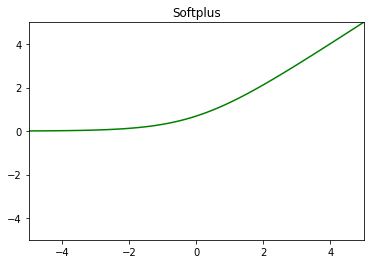

In [24]:
import matplotlib.pyplot as plt
plt.plot(x, np.log(1 + math.e**x), 'g-')
plt.title('Softplus')
plt.axis([-5, 5, -5, 5])
plt.show()

* The derivative of the Softplus function is the logistic function
* Pros of Softplus:  Continuous, differentiable at zero
* Cons of Softplus:  Due to log and exponential, there's added computation compared to ReLUs, and ReLUs still have as good performance in practice
* Therefore, Softplus is usually discouraged to be used in deep learning

* Leaky ReLU - same as ReLU, but in negative domain, gradient is 0.01
* Parametric ReLU (PReLU) - instead of having gradient of 0.01 in negative domain, it's $$\alpha(x)$$

* Alpha is a learned parameter, updated during training
* Randomized Leaky ReLU - Instead of alpha being trained, it's sampled from a uniform distribution randomly
    * Can have an effect similar to dropout since we technically have a different network for each value of alpha, so it's something like an ensemble
    * At test time, all values of alpha are averaged together
* ReLU6 - still zero in negative domain, but in positive domain, it's capped at 6
* Adding layers to a NN allows it to learn more complex functions
* Adding nodes to a layer adds new dimensions to vector space
* Neural networks can be arbitrarily complex. To increase hidden dimensions, I can add neurons. To increase function composition, I can add layers. If I have multiple labels per example, I can add outputs.


$$\sqrt{x^2}$$

$$\frac{1}{2}$$

## Unit 2 - Matrices

### Dot Products

$$\vec{v} \cdot \vec{w} = \vec{v}^T \cdot \vec{w} = \sum_{i = 1}^{n}v_i w_i $$

The dot product allows us to extend the notion of angle to **all dimensions**

![dot product](images/dotproduct001.png)

$\vec{v} = \begin{pmatrix}v_1\\0\end{pmatrix} \vec{w} = \begin{pmatrix}w_1\\w_2\end{pmatrix}$

$\vec{v} \cdot \vec{w} = v_1 \cdot w_1 + 0 \cdot w_2 = v_1 \cdot w_1$

$= v_1 \left\lVert \vec{w} \right\rVert \cos \theta$

$= \left\lVert \vec{v} \right\rVert \cdot \left\lVert \vec{w} \right\rVert \cos \theta$

$\vec{v} \cdot \vec{w} = \left\lVert \vec{v} \right\rVert \cdot \left\lVert \vec{w} \right\rVert \cos \theta$

The dot product is the same thing as the product of the norms multiplied by cosine of the angle between them.

$\theta = \arccos \frac{\vec{v} \cdot \vec{w}}{\left\lVert \vec{v} \right\rVert \cdot \left\lVert \vec{w} \right\rVert}$

Orthogonality: $\vec{v} \cdot \vec{w} = 0 $ 

Assume $\left\lVert \vec{v} \right\rVert , \left\lVert \vec{w} \right\rVert \neq 0$ (that is, no zero-length vectors)

Only when $cos \theta$ is 0 can $\vec{v} \cdot \vec{w} $ be zero, so $\theta$ = either $\frac{-\pi}{2}$ or $\frac{\pi}{2}$ (i.e., -90 degrees or 90 degrees)

All this means is that we're talking about two vectors at right angles to one another

Remember, the $L_1$ norm of a vector is just the sum of the absolute values of the elements in the vector, and the $L_2$ norm (aka Euclidian norm) is the square root of the sum of the squares of the elements in the vector.

$\cos \theta$ is only 0 at $\frac{-\pi}{2}$ and $\frac{\pi}{2}$

Consider the case where $\vec{v} \cdot \vec{w} > 0 $ 

$= \left\lVert \vec{v} \right\rVert \cdot \left\lVert \vec{w} \right\rVert \cos \theta$

Which means that $\cos \theta$ > 0

So where is this true?  It's where $\cos \theta$ lies between $\frac{-\pi}{2}$ or $\frac{\pi}{2}$ or some angle that's < 90 degrees compared to v

![dot product](images/dotproduct002.png)

Remember, this works the same no matter how many dimensions we're talking about.

#### Negative Inner Product

$ = \left\lVert \vec{v} \right\rVert \cdot \left\lVert \vec{w} \right\rVert < 0 $

$ = \left\lVert \vec{v} \right\rVert \cdot \left\lVert \vec{w} \right\rVert \cos \theta < 0$

$ = \cos \theta < 0 $

$ | \theta | > \frac{\pi}{2} $

This means angle is > 90 degrees

![dot product](images/dotproduct003.png)

To summarize:

* If the dot product is positive, the vectors are pointing somewhat in the same direction
* If the dot product is zero, the vectors are orthogonal to one another
* If the dot product is negative, the vectors are pointing somewhat away from each other

#### Hyperplane Definition

* It is the thing orthogonal to a given vector
* All hyperplanes pass through the zero point or origin for your vector (0,0 for 2-dimensions, 0,0,0 for 3-dimensions, etc.) OR a translated to a different point
* Geometric notion of a hyperplane is just some subspace of your given high dimensional space that separates it into two equal parts

#### Decision Plane

* Separates whether or not a feature passes a certain threshold

Given a weight vector $ \left\lVert \vec{w} \right\rVert $ and a data vector $ \left\lVert \vec{v} \right\rVert $ we're asking if this weight vector applied to the data vector exceeds some threshold C

Think of $ \vec{w} $ as being fixed, we're looking to see if $ C < \left\lVert \vec{w} \right\rVert \cdot \left\lVert \vec{v} \right\rVert \cdot \cos \theta $ 

Dividing by $ \vec{w} $ we get:

$ \left\lVert \vec{v} \right\rVert \cos \theta > \frac{C}{\left\lVert \vec{w} \right\rVert} $ 

When we say, "Does w dot v exceed C" it's the same thing as "Does norm v times cosine of angle between them exceed this C over norm w"

Norm v * cosine theta is length of the orthogonal projection of $ \vec{v} $ onto $ \vec{w} $

So what we're asking is if the length of the projection is longer than $ \frac{C}{\left\lVert \vec{w} \right\rVert} $ 

![dot product](images/dotproduct004.png)

The orange line represents $ \left\lVert \vec{w} \right\rVert \cdot \left\lVert \vec{v} \right\rVert = C $

![dot product](images/dotproduct005.png)

So this is the decision plane that separates one side from the other, in this case, to the upper right, $ \left\lVert \vec{w} \right\rVert \cdot \left\lVert \vec{v} \right\rVert > C $ and if you're to the lower left, $ \left\lVert \vec{w} \right\rVert \cdot \left\lVert \vec{v} \right\rVert < C $

Think of this as the decision of whether an image is classified as a cat or a dog

### Matrix Multiplication

If A is a matrix where the rows are features $ w_i $ and B is a matrix where the columns are data vectors $ v_j $ then the i,j-th entry of the product is $ w_i v_j $, which is to say the i-th feature of the j-th vector.

In formulae:  if C = AB, where A is an n x m matrix and B is an m x k matrix, then C is an n x k matrix where

$$c_{i , j} = \sum_{l} a_{i,l} b_{l,j}$$

Which just means "dot product of i-th row by j-th column"

Can chain together many matrix multiplications as long as the "inner dimensions" are the same for each pair

$ A_1 A_2 A_3 A_4 $

This works if $ A_1 $ is an $ n_1 $ by $ n_2 $ matrix and $ A_2 $ is an $ n_2 $ by $ n_3 $ matrix, $ A_3 $ is an $ n_3 $ by $ n_4 $ matrix, etc.

### The Hadamard Product



An often less useful method of multiplying matrices is **element-wise**

Two matrices A and B that have the same shape (e.g., 3x2 and 3x2) - just multiply elements in same position, results in same shape matrix (here, 3x2)

Normally denoted with a circle, like this:  $ A \circ B $

This does come up when you're dealing with derivatives of matrix-valued functions, which you see oftentimes in ML applications.

### Product Properties

Remember that matrix multiplication is commutative if - and only when - both of the matrices are diagonal and of equal dimensions.

### Geometry Matrix Operation



### Determinant Computation

### Invertibility

### Linear Dependence

## Unit 3 - Probability



## Unit 4 - Univariate Derivatives

## Unit 5 - Multivariate Derivatives